In [152]:
import pandas as pd
import matplotlib.pyplot as plt
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [153]:
df = pd.read_csv('preprocessed_olympic_dataset.csv')
df = df.drop('Unnamed: 0', axis=1)
df

,NOC,Sport,Nb_event,Starting_age,Experience,IMC_moyen,isWoman,target
0,CHN,Basketball,1,24.00,0.00,24.69,False,False
1,CHN,Judo,1,23.00,0.00,20.76,False,False
2,MAS,Hockey,1,26.00,0.00,22.78,False,False
3,IRQ,Athletics,2,24.63,0.00,22.09,False,False
4,FRA,Rugby,1,24.63,0.00,22.78,False,True
...,...,...,...,...,...,...,...,...
124613,TUR,Volleyball,1,27.00,0.00,20.90,True,False
124614,TUR,Athletics,2,22.00,4.00,17.26,True,False
124615,TUR,Shooting,1,33.00,0.00,25.51,False,False
124616,TUR,Athletics,1,26.00,0.00,23.36,False,False


In [154]:
target_true = len(df[df['target']==True])
target_false = len(df['target'])-target_true

#Attention au rapport de rapport
print(f"true : {target_true}", f"/ false : {target_false}")

true : 25260 / false : 99358


# Changer string en float pour modèle

In [155]:
le_noc = preprocessing.LabelEncoder()
le_noc.fit(df['NOC'])
encoded_noc = le_noc.transform(df['NOC'])

In [156]:
le_sport = preprocessing.LabelEncoder()
le_sport.fit(df['Sport'])
encoded_sport = le_sport.transform(df['Sport'])

In [157]:
df_encoded = df.copy()
df_encoded['NOC'] = encoded_noc
df_encoded['Sport'] = encoded_sport

In [158]:
df_encoded

,NOC,Sport,Nb_event,Starting_age,Experience,IMC_moyen,isWoman,target
0,41,8,1,24.00,0.00,24.69,False,False
1,41,32,1,23.00,0.00,20.76,False,False
2,126,29,1,26.00,0.00,22.78,False,False
3,96,5,2,24.63,0.00,22.09,False,False
4,69,44,1,24.63,0.00,22.78,False,True
...,...,...,...,...,...,...,...,...
124613,206,62,1,27.00,0.00,20.90,True,False
124614,206,5,2,22.00,4.00,17.26,True,False
124615,206,47,1,33.00,0.00,25.51,False,False
124616,206,5,1,26.00,0.00,23.36,False,False


# Standardiser les données

In [159]:
# Si jamais il y a besoin (ici pas vraiment)
# scaler = StandardScaler()

# Création jeux de test/train

In [160]:
y = df_encoded['target']
X = df_encoded.drop('target', axis=1)

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [162]:
print('shape jeu train : ', X_train.shape)
print('shape jeu validation : ', X_test.shape)
print('shape target train : ', y_train.shape)
print('shape taregt validation : ', y_test.shape)

shape jeu train :  (99694, 7)
shape jeu validation :  (24924, 7)
shape target train :  (99694,)
shape taregt validation :  (24924,)


# Modèles lazypredict

In [75]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|███████████████████████████████████████████████████| 29/29 [39:16<00:00, 81.25s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
BaggingClassifier,0.83,0.68,0.68,0.82,3.03
DecisionTreeClassifier,0.79,0.68,0.68,0.79,0.37
RandomForestClassifier,0.83,0.68,0.68,0.82,11.30
ExtraTreesClassifier,0.83,0.68,0.68,0.81,9.77
ExtraTreeClassifier,0.78,0.66,0.66,0.78,0.14
XGBClassifier,0.84,0.66,0.66,0.82,1.52
LGBMClassifier,0.83,0.62,0.62,0.80,0.42
NearestCentroid,0.71,0.62,0.62,0.72,0.07
KNeighborsClassifier,0.78,0.60,0.60,0.76,1.85


On va donc choisir le XBG Classifier

# Modèle Scikit learn - Regression logistique

In [73]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [74]:
clf.score(X_test, y_test)

0.7968624618841278

# XBG Classifier

- max_depth: The maximum depth per tree. A deeper tree might increase the performance, but also the complexity and chances to overfit.
The value must be an integer greater than 0. Default is 6.


- learning_rate: The learning rate determines the step size at each iteration while your model optimizes toward its objective. A low learning rate makes computation slower, and requires more rounds to achieve the same reduction in residual error as a model with a high learning rate. But it optimizes the chances to reach the best optimum.
The value must be between 0 and 1. Default is 0.3.


- n_estimators: The number of trees in our ensemble. Equivalent to the number of boosting rounds.
The value must be an integer greater than 0. Default is 100.
NB: In the standard library, this is referred as num_boost_round.


- colsample_bytree: Represents the fraction of columns to be randomly sampled for each tree. It might improve overfitting.
The value must be between 0 and 1. Default is 1.


- subsample: Represents the fraction of observations to be sampled for each tree. A lower values prevent overfitting but might lead to under-fitting.
The value must be between 0 and 1. Default is 1.


*Valeurs conseillées*
- max_depth: 3–10
- n_estimators: 100 (lots of observations) to 1000 (few observations)
- learning_rate: 0.01–0.3
- colsample_bytree: 0.5–1
- subsample: 0.6–1

In [164]:
import xgboost as xgb
from sklearn.metrics import confusion_matrix


xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42, max_depth=12, n_estimators=113, learning_rate= 0.14, colsample_bytree=1, subsample=0.91)
xgb_model.fit(X_train, y_train)


y_pred = xgb_model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
confusion_results = confusion_matrix(y_test, y_pred)


true_predictions = confusion_results[0][0] + confusion_results[1][1]
all_predictions = confusion_results[0][0]+confusion_results[0][1]+confusion_results[1][0]+confusion_results[1][1]

print(f"Score : {true_predictions/all_predictions}")

[[18946   889]
 [ 2779  2310]]
Score : 0.8528326111378591


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

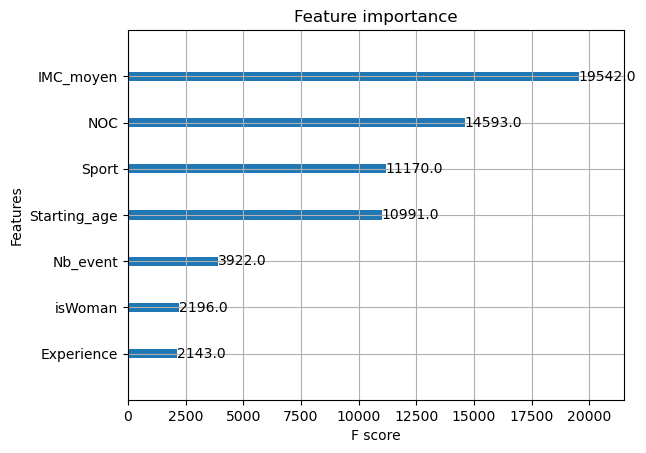

In [149]:
xgb.plot_importance(xgb_model)

# plot the output tree via matplotlib, specifying the ordinal number of the target tree
# xgb.plot_tree(xgb_model, num_trees=xgb_model.best_iteration)

# converts the target tree to a graphviz instance
# xgb.to_graphviz(xgb_model, num_trees=xgb_model.best_iteration)